In [1]:
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [8]:
conn = mysql.connector.connect(
    host='localhost',
    user='root',
    password='Twisted@love25',
    database='readraterdb'
)


In [9]:
query = """
SELECT r.id   AS review_id,
       r.book_id,
       b.title,
       b.author,
       r.rating,
       r.comment,
       r.created_at
  FROM reviews r
  JOIN books b ON b.id = r.book_id;
"""
reviews_df = pd.read_sql(query, conn)
reviews_df.head()


C:\Users\meena\AppData\Local\Temp\ipykernel_16988\3501441081.py:12: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  reviews_df = pd.read_sql(query, conn)


,review_id,book_id,title,author,rating,comment,created_at
0,3,1,the hobbit,J.R.R. Tolkien,4,nice,2025-04-21 23:34:33


In [4]:
# compute average rating per book title
avg_rating = (
    reviews_df
      .groupby('title')['rating']
      .mean()
      .sort_values(ascending=False)
)

# show the top 10
avg_rating.head(10)


title
the hobbit    4.0
Name: rating, dtype: float64

In [5]:
dist = reviews_df['rating'].value_counts().sort_index()
dist


rating
4    1
Name: count, dtype: int64

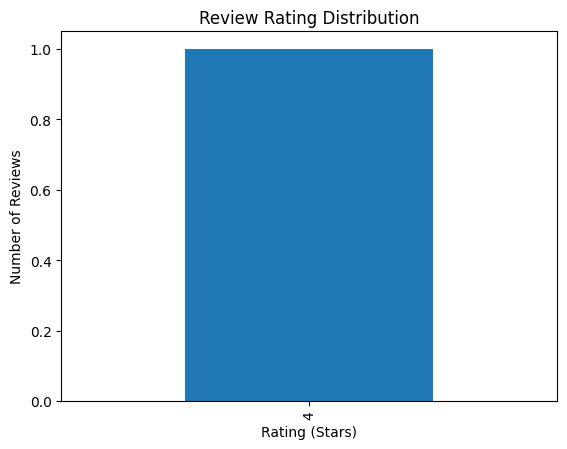

In [6]:
# Bar chart of rating distribution
dist.plot(kind='bar')
plt.title('Review Rating Distribution')
plt.xlabel('Rating (Stars)')
plt.ylabel('Number of Reviews')
plt.show()


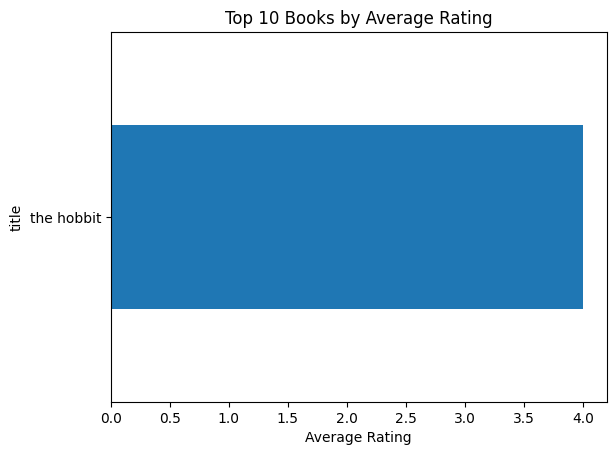

In [7]:
avg_rating.head(10).plot(kind='barh')
plt.title('Top 10 Books by Average Rating')
plt.xlabel('Average Rating')
plt.gca().invert_yaxis()  # highest at top
plt.show()
